Display this as a slide deck using [RISE](https://damianavila.github.io/RISE/).

# Quantum Edge Detection

This demonstration shows how to use [Qiskit™](https://qiskit.org/) to perform edge detection in images with the quantum Hadamard edge detection algorithm, which completes the task with just one single-qubit operation, independent of the size of the image, illustrating the potential of quantum image processing for highly efficient image and video processing.

![noimg](./img/edge.png)

## What indicates an edge?

Consider the following row of pixels called $\alpha$:

$$\alpha = [0, 0, 0, 1, 1, 1, 0, 0, 0],$$

![p](./img/p.png)

and the difference of its nearest neighboring pixels called $\Delta \alpha$

$$\Delta \alpha = [\alpha_1-\alpha_0, \alpha_2-\alpha_1, \ldots, \alpha_n-\alpha_{n-1},\alpha_0-\alpha_n]$$

$$\Delta \alpha = [0,0,1,0,0,-1,0,0,0]$$

![dp](./img/dp.png)

The differences $\Delta \alpha$ take on non-zero values where there are changes (edges) in the original image $\alpha$.

So, $\Delta \alpha$ indicates edges in $\alpha$.

## The Hadamard quantum gate

The Hadamard gate has the following effect on the zero and one basis states of a qubit:

$H|0\rangle \rightarrow (|0\rangle + |1\rangle)/\sqrt{2}$

$H|1\rangle \rightarrow (|0\rangle - |1\rangle)/\sqrt{2}$

Consider a two pixel image that we represent with a single qubit:

$$|\textrm{image}\rangle = \alpha_0 |0\rangle + \alpha_1 |1\rangle$$

where $\alpha_0$ is proportional to the value of pixel 0, $\alpha_1$ is proportional to the value of pixel 1. The $\alpha$'s now also tell us the probabilty of finding the qubit in state $|0\rangle$ or $|1\rangle$ when we measure it. We will find the qubit in state $|0\rangle$ with a probabilty of $\alpha_0^2$, or in the state $|1\rangle$ with probability $\alpha_1^2$.

When we apply the Hadamard quantum gate to the image state, it gets transformed into a new state as follows:

$$H|\textrm{image}\rangle = H \alpha_0 |0\rangle + H \alpha_1 |1\rangle$$

$$H|\textrm{image}\rangle = \alpha_0 H |0\rangle + \alpha_1 H |1\rangle$$

$$H|\textrm{image}\rangle = \alpha_0 (|0\rangle + |1\rangle)/\sqrt{2} + \alpha_1 (|0\rangle - |1\rangle)/\sqrt{2}$$

$$H|\textrm{image}\rangle =  \frac{1}{\sqrt{2}}\left[(\alpha_0 + \alpha_1)|0\rangle + (\alpha_0 - \alpha_1)|1\rangle)\right]$$

Now if we measure the qubit, the probabilty of finding it in state $|0\rangle$ is $P(0) = (\alpha_0 + \alpha_1)^2/2$ and the probability of finding it in state $|1\rangle$ is $P(1) = (\alpha_0 - \alpha_1)^2/2$.

If the two pixels have the same value, then $\alpha_0 - \alpha_1 = 0$, so $P(1) = 0$. If the two pixels have different values, then $P(1) > 0$.

This is a clue that the Hadamard quantum gate can be used to indicate edges in an image.

## Representing an image as a state vector

Represent the image as a quantum state as follows

![no_img](./img/quantum_encoding.png)

The image begins as a matrix of values at certain pixel positions. Unravel the matrices to form vectors. Then rewrite the pixel positions from decimal to binary.

The image can then be represented as the quantum state of a two qubit system:

$$|\textrm{image}\rangle = \frac{0.2 |00\rangle + 0.8 |01\rangle + 0.7 |10\rangle + 0.3 |11\rangle}{\sqrt{0.2^2 + 0.8^2 + 0.7^2 + 0.3^2}}$$

## Programming the encoding

Read the example image in and display it. Get the first color channel of the image and `ravel` it to form a column vector.

In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
from skimage.transform import resize

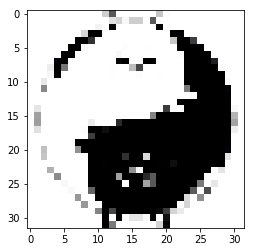

In [2]:
filename = './img/schrodin_yang.png'
im = mpimg.imread(filename)

n_pixels = 2**5
im = resize(im, (n_pixels, n_pixels))

data = im[:,:,0].ravel()

fig, ax = plt.subplots()
ax.imshow(im)

Use Qiskit Aqua to encode the image as a quantum state.

In [3]:
n_qubits = int(np.log2(len(data)))

from qiskit_aqua.components.initial_states import Custom
init_state = Custom(n_qubits, state_vector=data)

Get the quantum circuit `circ` that creates the image representation and its quantum register `qr` containing qubits. The circuit's register begins in the zero state $|000\ldots 000\rangle$ (as many zeros as there are qubits) that get modified by quantum gates to end up in the state that represents the image, $|\textrm{image}\rangle$.

In [4]:
circ = init_state.construct_circuit('circuit')
qr   = circ.qregs

The series of quantum gates (the quantum circuit) for a 4x4 version of the image is

In [6]:
# circ.draw()

![circ](./img/circ.png)

## The Hadamard gate with more than 2 pixels

Recall that the Hadamard gate has the following effect on the zero and one basis states:

$H|0\rangle \rightarrow (|0\rangle + |1\rangle)/\sqrt{2}$

$H|1\rangle \rightarrow (|0\rangle - |1\rangle)/\sqrt{2}$

Consider a four pixel image, represented with two qubits, and what happens when a Hadamard gate is applied to just the last qubit. We'll subscript the Hadamard operator to tell which qubit it's acting on.

$$ |\textrm{image}\rangle = \alpha_{00}|00\rangle + \alpha_{01}|01\rangle + \alpha_{10}|10\rangle + \alpha_{11}|11\rangle $$

$$ |\textrm{image}\rangle = \alpha_{00}|0\rangle|0\rangle + \alpha_{01}|0\rangle|1\rangle + \alpha_{10}|1\rangle|0\rangle + \alpha_{11}|1\rangle|1\rangle $$

$$ \sqrt{2} H_0 |\textrm{image}\rangle = \alpha_{00}|0\rangle \sqrt{2} H |0\rangle + \alpha_{01}|0\rangle \sqrt{2} H|1\rangle + \alpha_{10}|1\rangle \sqrt{2} H|0\rangle + \alpha_{11}|1\rangle\sqrt{2} H|1\rangle$$

$$ \sqrt{2} H_0 |\textrm{image}\rangle = \alpha_{00}|0\rangle(|0\rangle + |1\rangle) + \alpha_{01}|0\rangle(|0\rangle - |1\rangle) + \alpha_{10}|1\rangle(|0\rangle + |1\rangle) + \alpha_{11}|1\rangle(|0\rangle - |1\rangle)$$

$$ \sqrt{2} H_0 |\textrm{image}\rangle = \alpha_{00}(|00\rangle+|01\rangle) + \alpha_{01}(|00\rangle-|01\rangle) + \alpha_{10}(|10\rangle+|11\rangle) + \alpha_{11}(|10\rangle-|11\rangle) $$

$$ \sqrt{2} H_0 |\textrm{image}\rangle = (\alpha_{00} + \alpha_{01})|00\rangle + (\alpha_{00} - \alpha_{01})|01\rangle + (\alpha_{10} + \alpha_{11})|10\rangle + (\alpha_{10} - \alpha_{11})|11\rangle $$

$$ \sqrt{2} H_0 |\textrm{image}\rangle = (\alpha_{00} + \alpha_{01})|00\rangle + (\alpha_{00} - \alpha_{01})|01\rangle + (\alpha_{10} + \alpha_{11})|10\rangle + (\alpha_{10} - \alpha_{11})|11\rangle $$

What happens to the state above if we measure just the state of the first qubit and happen to get the result $1$? The state of the second qubit will still be undetermined, but the system's overall state vector would be made up of only those states consistent with our first measurement: $|01\rangle$ and $|11\rangle$. So, if the first measurement results in a 1, it must shrink, or *collapse*, the state down to one proportional to

$$ |\textrm{final state}\rangle = (\alpha_{00} - \alpha_{01})|01\rangle + (\alpha_{10} - \alpha_{11})|11\rangle $$

which holds just the edge information we're interested in.

## Implementing the algorithm

Beginning with the circuit `circ` that generates the image's state vector representation, apply the Hadamard gate to *just* the first qubit. This is the entire quantum algorithm!

In [5]:
circ.h(qr[0][0])

Simulate the circuit using the `StatevectorSimulator` and read the resulting state vector.

In [6]:
from qiskit import BasicAer, execute

In [14]:
simulator   = BasicAer.get_backend('statevector_simulator')
sim_result  = execute(circ, simulator).result()
final_state = sim_result.get_statevector(circ)

In [8]:
from qiskit import ClassicalRegister, QuantumCircuit
c = ClassicalRegister(1,'c')
meas = QuantumCircuit(qr[0],c)
meas.measure(qr[0][0],c[0])
circuit = circ + meas

In [23]:
backend_sim = BasicAer.get_backend('qasm_simulator')
result = execute(circuit, backend_sim).result()
counts = result.get_counts(circuit)
print(counts)

{'0': 975, '1': 49}


In [20]:
simulator   = BasicAer.get_backend('statevector_simulator')
sim_result  = execute(circuit, simulator).result()
final_state = sim_result.get_statevector(circuit)

## Decode the state vector back into an image

To turn the state vector back into an image, read off the $\alpha$'s and reshape the column vector back into a matrix.

In [21]:
edge   = np.real(final_state)
n_rows = int(np.sqrt(len(edge)))
n_cols = n_rows
edge   = edge.reshape(n_rows, n_cols)

The edges are indicated by the basis states where the first qubit is $1$. After decoding the 1-D state vector back into a 2-D image, these basis states are the 2-D image's even columns. To retain only these columns, zero out the odd columns.

In [11]:
edge[:,::2] = 0

Display the edges and the original image for comparison.

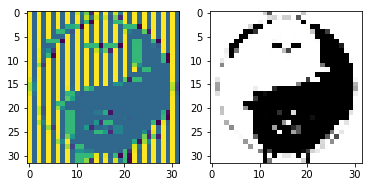

In [22]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(edge)
ax[1].imshow(im)

Notice we've only found the edges in every other column of the image. A modification of the QHED algorithm can find the edges in all columns with a single circuit, as described in [Yao, Xi-Wei et al., Quantum Image Processing and Its Application to Edge Detection: Theory and Experiment, Phys. Rev. X 7, 031041, (2017)](https://journals.aps.org/prx/abstract/10.1103/PhysRevX.7.031041).